In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Downloads/Placement.csv')

In [4]:
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


In [5]:
df.shape

(100, 4)

In [6]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [7]:
# Need all the rows[:] and column [1:] after first column
df = df.iloc[:,1:]

In [8]:
df.head()

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CGPA       100 non-null    float64
 1   IQ         100 non-null    int64  
 2   Placement  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


- Data Exploration

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

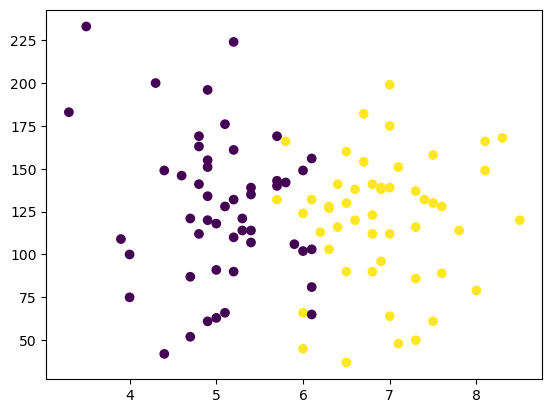

In [12]:
plt.scatter(df['CGPA'],df['IQ'],c = df['Placement'])

- Extracting input and output columns

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,CGPA,IQ
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [15]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: Placement, Length: 100, dtype: int64

- Splitting the data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_test_split(X,y,test_size=0.1)

[    CGPA   IQ
 23   4.7   87
 83   7.5  130
 28   5.2   90
 65   8.1  166
 24   4.7  121
 ..   ...  ...
 63   6.3  128
 32   7.0  139
 98   6.3  103
 58   8.0   79
 93   6.8  112
 
 [90 rows x 2 columns],
     CGPA   IQ
 60   6.9  139
 96   4.4   42
 47   5.2  161
 52   7.0  175
 27   6.0  124
 6    5.7  143
 37   8.1  149
 59   4.8  112
 95   4.3  200
 49   5.4  135,
 23    0
 83    1
 28    0
 65    1
 24    0
      ..
 63    1
 32    1
 98    1
 58    1
 93    1
 Name: Placement, Length: 90, dtype: int64,
 60    1
 96    0
 47    0
 52    1
 27    1
 6     0
 37    1
 59    0
 95    0
 49    0
 Name: Placement, dtype: int64]

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [19]:
X_train

,CGPA,IQ
94,4.7,52
12,5.4,139
99,6.2,113
8,6.1,156
92,5.2,110
...,...,...
42,7.6,89
10,6.0,45
74,6.7,154
53,8.3,168


In [20]:
y_train

94    0
12    0
99    1
8     0
92    0
     ..
42    1
10    1
74    1
53    1
71    1
Name: Placement, Length: 90, dtype: int64

In [21]:
X_test

,CGPA,IQ
95,4.3,200
9,5.1,66
17,3.3,183
51,4.8,141
72,7.3,116
49,5.4,135
11,6.9,138
2,5.3,121
35,6.8,90
39,4.6,146


- Scaling the value

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_train   # Data has been tranformed/Scaled

array([[-1.22472747, -1.76890202],
       [-0.5938376 ,  0.41503094],
       [ 0.12717939, -0.23763868],
       [ 0.03705226,  0.84177646],
       [-0.77409185, -0.31294672],
       [ 0.39756076, -0.81500027],
       [ 1.298832  ,  0.89198182],
       [-0.86421898,  0.13890148],
       [ 0.21730651,  0.13890148],
       [ 1.11857775, -1.81910738],
       [-1.13460035,  1.16811127],
       [-1.49510884,  0.66605772],
       [ 2.20010323, -0.06191994],
       [-1.49510884, -2.0199288 ],
       [-1.22472747, -0.03681726],
       [-0.77409185,  0.96728985],
       [-1.85561734, -0.56397349],
       [ 0.03705226, -1.44256721],
       [-1.94574446, -0.33804939],
       [-0.86421898,  1.34383001],
       [ 0.21730651,  0.11379881],
       [ 0.84819638,  0.41503094],
       [-0.5938376 , -0.212536  ],
       [ 0.30743363,  0.46523629],
       [ 0.84819638, -0.26274136],
       [ 0.84819638,  1.9211916 ],
       [ 0.9383235 ,  0.71626307],
       [-1.04447322, -1.54297792],
       [-0.32345623,

In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_test

array([[-1.58523597,  1.94629428],
       [-0.86421898, -1.41746454],
       [-2.48650721,  1.51954876],
       [-1.13460035,  0.46523629],
       [ 1.11857775, -0.16233065],
       [-0.5938376 ,  0.31462023],
       [ 0.75806925,  0.38992826],
       [-0.68396473, -0.03681726],
       [ 0.66794213, -0.81500027],
       [-1.3148546 ,  0.59074968]])

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()

In [31]:
#Model Training
clf.fit(X_train,y_train)

LogisticRegression()

- Evaluating the model

In [34]:
y_pred = clf.predict(X_test)

In [33]:
y_test

95    0
9     0
17    0
51    0
72    1
49    0
11    1
2     0
35    1
39    0
Name: Placement, dtype: int64

In [36]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test, y_pred)

1.0

In [41]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 1.3 MB/s eta 0:00:00


In [42]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

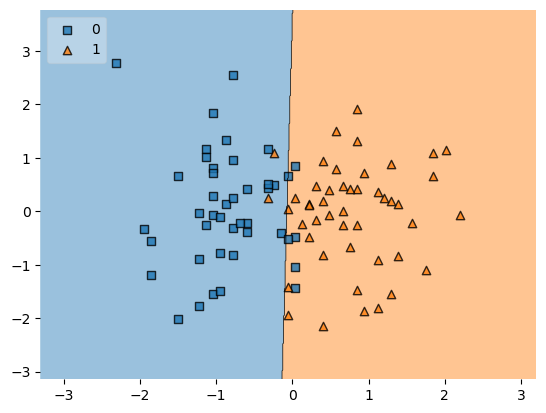

In [44]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)